# House Sales in King County, USA
### Regularization and Selecting Models
Modelling housing prices using the king county home sales.
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/anapaulavarejao/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



## House Sales in King County, USA

Modelling housing prices using the king county home sales.<br>
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In this post, we’ll explore ridge and lasso regression models. The idea is that by shrinking or regularizing the coefficients, prediction accuracy can be improved, variance can be decreased, and model interpretabily can also be improved.

**Regularization** is a technique used in an attempt to solve the overfitting problem in statistical models.
When someone wants to model a problem, he will might want to add more explaining variables. Thus model becomes more interesting and more complex and you find out that your result are quite good but not as perfect as you wish. <br>
So you continue adding more variables and your model will do good but it is probably overfitting, i.e. it will probably have poor prediction and generalization power: it sticks too much to the data and the model has probably learned the background noise while being fit. This isn't of course acceptable.<br>
So how do you solve this? It is here where the regularization technique comes in handy.

# if you are using regression without regularization, you have to be very special!’...
Chief Product Officer at DataRobot<br>
source: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

Ridge and Lasso regression are powerful techniques generally used for creating models in presence of a ‘large’ number of features. Here ‘large’ can typically mean either of two things:<br>
Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting);<br>
Large enough to cause computational challenges. 


In [2]:
pd.set_option("max.columns", 30)
dt = pd.read_csv("kc_house_data.csv")
dt.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
dt.shape

(21613, 21)

In [4]:
dt.set_index("id", inplace=True)

In [5]:
dt.columns

Index([u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [6]:
drops = ["date", "lat", "long", "zipcode"]
dt.drop(drops, axis = 1, inplace=True)

In [7]:
dt.shape

(21613, 16)

In [8]:
dt.corr()["price"]

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

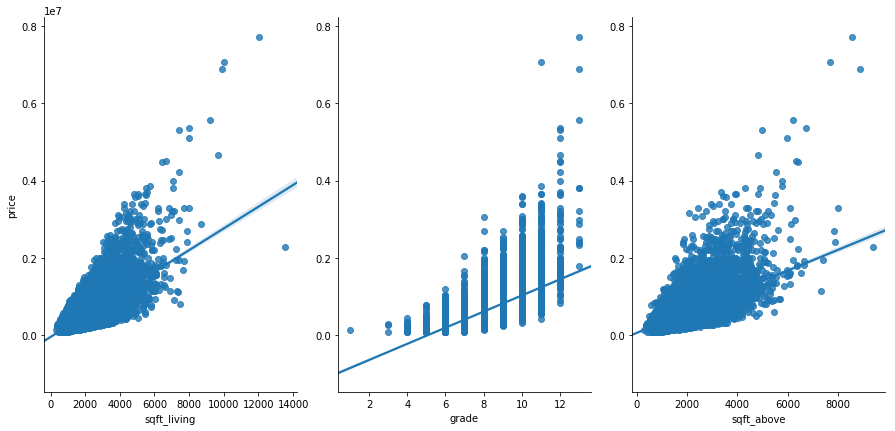

In [9]:
sns.pairplot(dt, x_vars=["sqft_living", "grade", "sqft_above"], y_vars='price', size=6, aspect=0.7, kind='reg');

In [10]:
#Assign X and y
X = dt.drop(["price"], axis =1)
ss = StandardScaler()
Xs = ss.fit_transform(X)
y = dt.price
#Make train test split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.25)

In [11]:
Xs.shape, y.shape

((21613, 15), (21613,))

### Seleting Features - L1 regularization / Lasso
OLS is Ordinary Least Square that determine the slope and intercept that minimize the sum of squared errors.<br>
**Lasso** is OLS function plus the sum of the absolute values of each coefficient. Has an advantage because it's great for feature selection and because it shrinks values of insignificant features to 0. <br>
Aka **L1 regularization**.

In [12]:
lasso_alphas = np.logspace(-4, 0, 50)
lasso_cv_scores = []
lista = []
for i in lasso_alphas:
    cv_score = cross_val_score(Lasso(alpha=i), Xs, y, cv = 5).mean()
    lasso_cv_scores.append(cv_score)
    lista.append((i, cv_score))
a = sorted(lista, key = lambda x:abs(x[1]), reverse = True)     

In [13]:
a[:5]

[(1.0, 0.64682026415181615),
 (0.82864277285468424, 0.64682023925807486),
 (0.68664884500429979, 0.64682021861853245),
 (0.56898660290182934, 0.64682020150781216),
 (0.47148663634573895, 0.64682018732370428)]

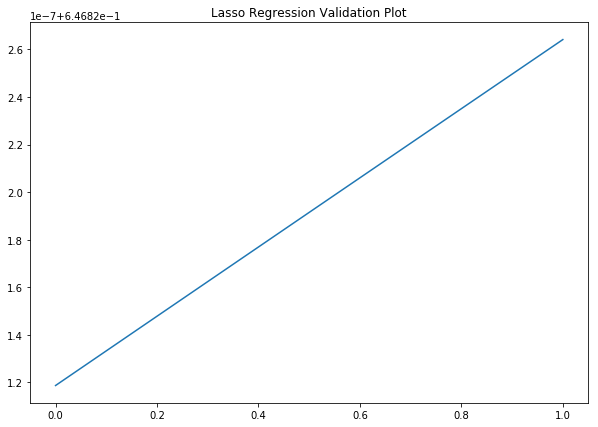

In [14]:
plt.figure(figsize=(10, 7))
plt.title("Lasso Regression Validation Plot")
plt.plot(lasso_alphas, lasso_cv_scores);

In [15]:
#Lasso
lasso = Lasso(alpha=a[0][0])
lasso.fit(X_train, y_train)
preds = lasso.predict(X_test)
coef = lasso.coef_
importances = sorted(dict(zip(X.columns, coef)).items(), key = lambda x:abs(x[1]), reverse = True)
importances

[('sqft_living', 267091.60750064231),
 ('grade', 139972.23608984257),
 ('sqft_above', -106699.45148577727),
 ('yr_built', -104589.154554359),
 ('sqft_basement', -59075.256201329343),
 ('waterfront', 45590.620395090511),
 ('bedrooms', -35612.929922380863),
 ('bathrooms', 35384.325975759879),
 ('view', 34917.28213016659),
 ('sqft_living15', 14845.764167602698),
 ('sqft_lot15', -13184.867181043812),
 ('floors', 13130.21009158145),
 ('condition', 11986.464695033774),
 ('yr_renovated', 5424.786542025181),
 ('sqft_lot', 34.933853579788135)]

#### Pretty way to show Features Importance

In [16]:
lst = zip(coef, X.columns)
lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
print "Lasso model: ", " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

Lasso model:  267091.608 * sqft_living + 139972.236 * grade + -106699.451 * sqft_above + -104589.155 * yr_built + -59075.256 * sqft_basement + 45590.62 * waterfront + -35612.93 * bedrooms + 35384.326 * bathrooms + 34917.282 * view + 14845.764 * sqft_living15 + -13184.867 * sqft_lot15 + 13130.21 * floors + 11986.465 * condition + 5424.787 * yr_renovated + 34.934 * sqft_lot


L1 regularized regression is unstable in a similar way as unregularized linear models are, meaning that the coefficients (and consequently feature ranks) can vary significantly even on small data changes when there are correlated features in the data. Which brings us to **L2 regularization**.

### L2 regularization / Ridge regression

OLS is Ordinary Least Square that determine the slope and intercept that minimize the sum of squared errors.
Ridge function is the standard OLS function plus the squared value of each coefficient multipled by a constant/parameter (alpha) determined by you (the data scientist). <br>
0 alpha equals OLS, very high alpha equals underfitting.<br>
Aka **L2 regularization**.

In [17]:
#Alpha values for ridge model
ridge_alphas = np.logspace(-4, 2.5, 50)
ridge_cv_scores = []
lista = []
for i in ridge_alphas:
    cv_score = cross_val_score(Ridge(alpha=i), Xs, y, cv = 5).mean()
    ridge_cv_scores.append(cv_score)
    lista.append((i, cv_score))
b = sorted(lista, key = lambda x:x[1], reverse = True)     
a[:5]

[(1.0, 0.64682026415181615),
 (0.82864277285468424, 0.64682023925807486),
 (0.68664884500429979, 0.64682021861853245),
 (0.56898660290182934, 0.64682020150781216),
 (0.47148663634573895, 0.64682018732370428)]

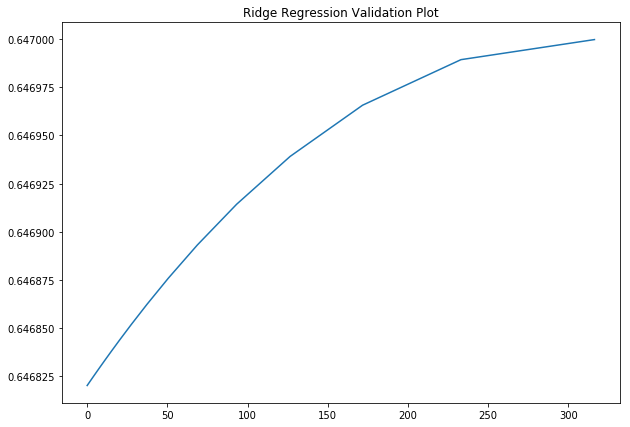

In [18]:
plt.figure(figsize=(10, 7))
plt.title("Ridge Regression Validation Plot")
plt.plot(ridge_alphas, ridge_cv_scores);

## What's the best models?

In [22]:
#Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print 'Linear r2:', round(r2_score(y_test, preds),4)
scores = cross_val_score(lr, Xs,y,cv=5, scoring='mean_squared_error')
print 'Linear rMSE :', np.sqrt(abs(scores)).mean()

#Ridge
ridge = Ridge(alpha=b[0][0])
ridge.fit(X_train, y_train)
preds = ridge.predict(X_test)
print 'Ridge r2:', round(r2_score(y_test, preds),4)
scores = cross_val_score(ridge, Xs,y,cv=5, scoring='mean_squared_error')
print 'Ridge rMSE :',  np.sqrt(abs(scores)).mean()
       
#Lasso
lasso = Lasso(alpha=a[0][0])
lasso.fit(X_train, y_train)
preds = lasso.predict(X_test)
print 'Lasso r2:', round(r2_score(y_test, preds),4)
scores = cross_val_score(lasso, Xs,y,cv=5, scoring='mean_squared_error')
print 'Lasso rMSE :',  np.sqrt(abs(scores)).mean()

 Linear r2: 0.658
Linear rMSE : 217755.878846
Ridge r2: 0.6573
Ridge rMSE : 217693.551406
Lasso r2: 0.658
Lasso rMSE : 217740.62417
